In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
# add cell type attribute
path_gex = '../data/paper data/atac2gex/test_mod2.h5ad'
adata_gex = sc.read_h5ad(path_gex)
path_data_ori = '../data/multiome_BMMC_processed/multiome_BMMC_processed.h5ad'
adata_ori = sc.read_h5ad(path_data_ori)

In [5]:
adata_ori_fil = adata_ori[adata_gex.obs_names]
adata_gex.obs["cell_type"] = adata_ori_fil.obs["cell_type"].tolist()

In [5]:
cell_group_dict = {
    "t cell": ['CD8+ T', 'CD8+ T naive','CD4+ T naive', 'CD4+ T activated'],
    "b cell": ['Naive CD20+ B', 'Transitional B', 'B1 B'],
    "prog": ['Lymph prog', 'MK/E prog', 'G/M prog'],
    "mono": ['CD14+ Mono', 'CD16+ Mono'],
    "blast cell": ['Proerythroblast', 'Erythroblast', 'Normoblast'],
    "Plasma cell": ['Plasma cell'],
    "NK": ["NK"],
    "cDC2": ["cDC2"],
    "HSC": ["HSC"],
    "pDC": ["pDC"],
}

In [14]:

cell_group_list = adata_ori_fil.obs["cell_type"].tolist()
print(set(cell_group_list))

cell_group = []
for cell in cell_group_list:
    for key in cell_group_dict.keys():
        if cell in cell_group_dict[key]:
            cell_group.append(key)
            break
adata_gex.obs["cell_group"] = cell_group

{'Lymph prog', 'CD8+ T', 'CD14+ Mono', 'Plasma cell', 'cDC2', 'HSC', 'B1 B', 'pDC', 'CD4+ T naive', 'CD4+ T activated', 'G/M prog', 'Normoblast', 'Transitional B', 'Proerythroblast', 'NK', 'Naive CD20+ B', 'MK/E prog', 'CD16+ Mono', 'CD8+ T naive', 'Erythroblast'}


In [15]:
adata_gex.obs

,batch,cell_type,cell_group
GACCTCAAGCTGTAAC-14-s4d8,s4d8,cDC2,cDC2
TGTTCCTCAAGCGAGC-13-s4d1,s4d1,CD14+ Mono,mono
AGGTAACCAAACCTTG-13-s4d1,s4d1,CD14+ Mono,mono
CGCTTCTAGCACTAGT-14-s4d8,s4d8,CD14+ Mono,mono
TATGGCCCAATGCGCT-14-s4d8,s4d8,Naive CD20+ B,b cell
...,...,...,...
ATCCTCATCTCAATAG-13-s4d1,s4d1,Plasma cell,Plasma cell
TGCTATGCAAACCTTG-14-s4d8,s4d8,NK,NK
GCTGGATGTTTGCGAA-13-s4d1,s4d1,B1 B,b cell
GCAAACAAGGCGCATC-14-s4d8,s4d8,CD8+ T,t cell


In [16]:
adata_gex.write('../data/paper data/atac2gex/test_data.h5ad')

In [2]:
path_gex = '../data/paper data/atac2gex/test_data.h5ad'
adata_gex = sc.read_h5ad(path_gex)

         Falling back to preprocessing with `sc.pp.pca` and default params.


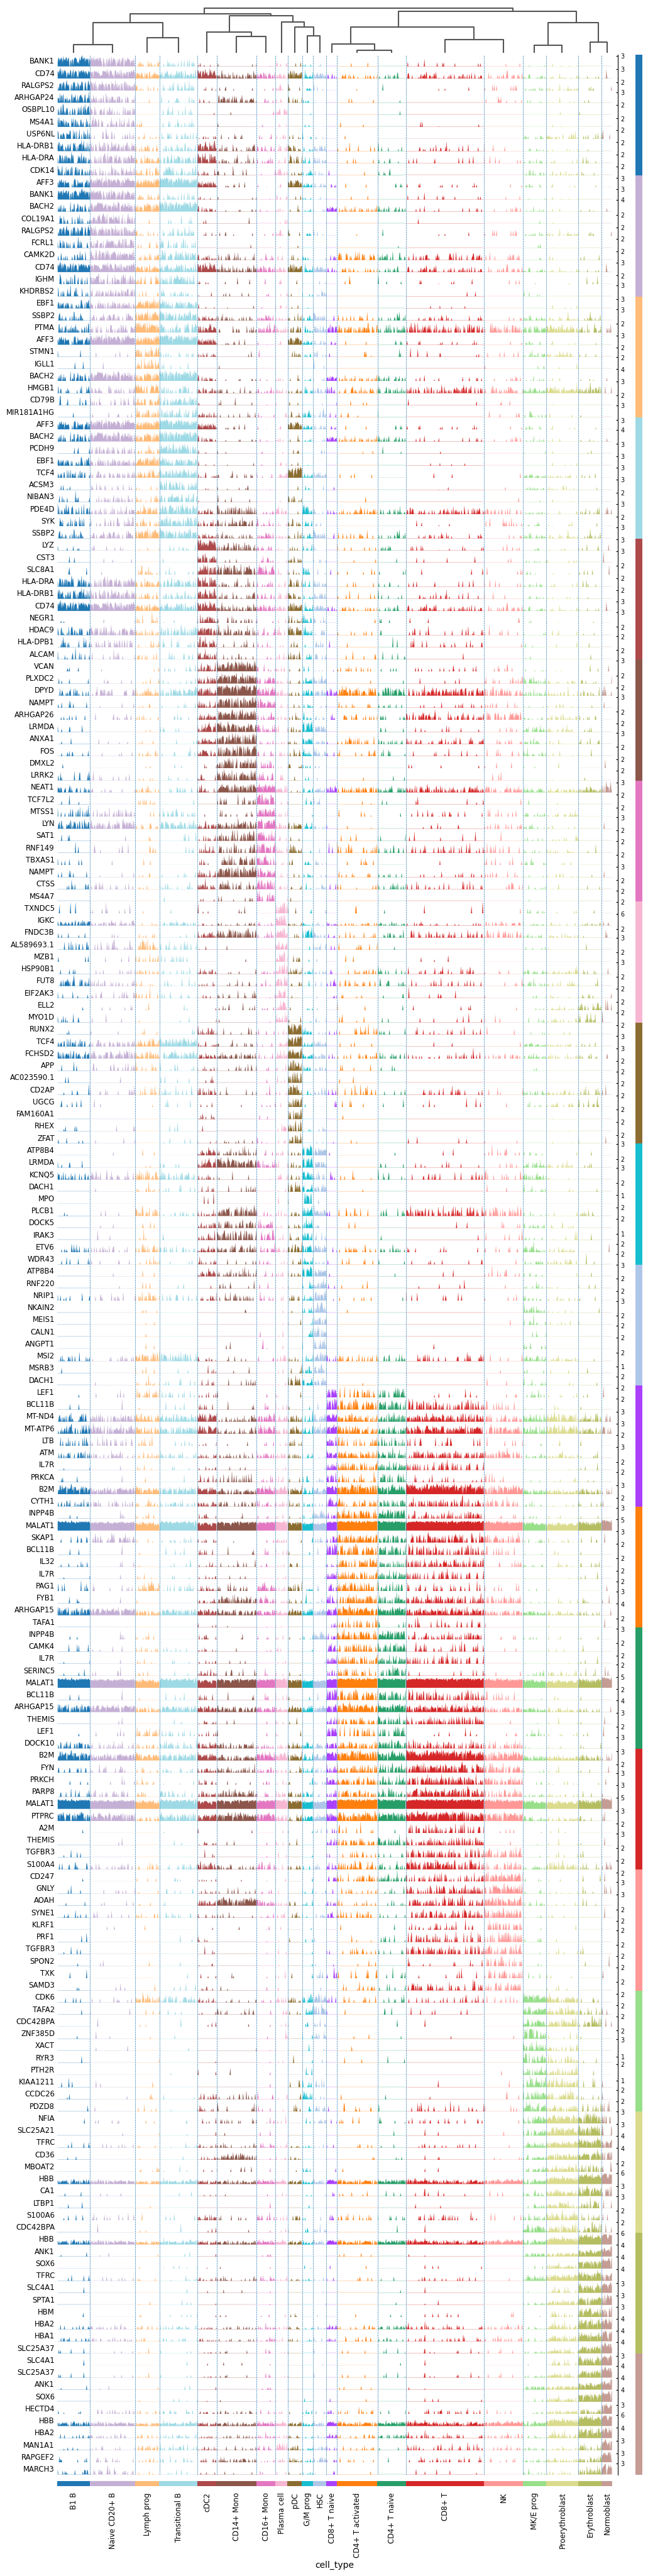

In [3]:
sc.tl.rank_genes_groups(adata_gex, groupby='cell_type', method='t-test_overestim_var')
sc.pl.rank_genes_groups_tracksplot(adata_gex, groupby='cell_type')

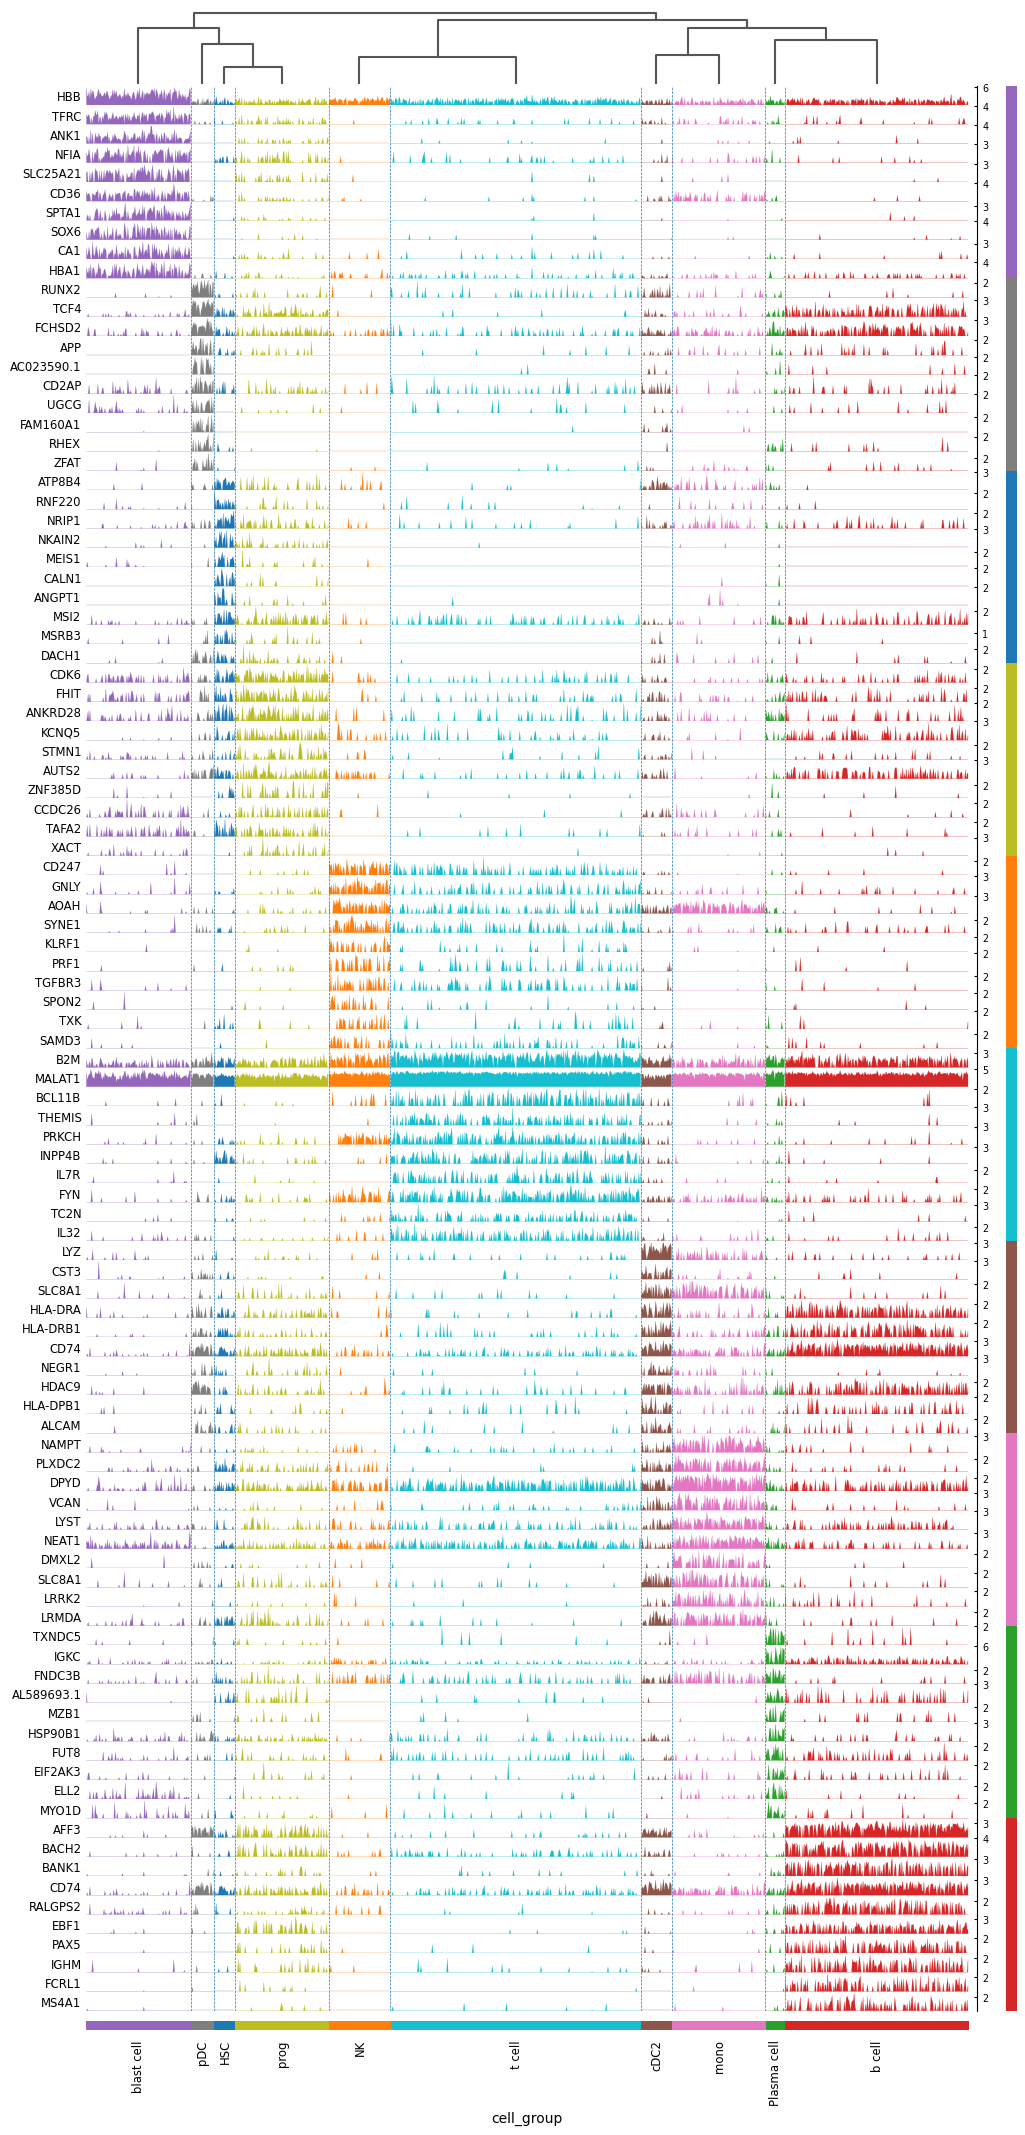

In [4]:
sc.tl.rank_genes_groups(adata_gex, groupby='cell_group', method='t-test_overestim_var')
sc.pl.rank_genes_groups_tracksplot(adata_gex, groupby='cell_group')

In [6]:
for cell_type in cell_group_dict.keys():
        dedf = sc.get.rank_genes_groups_df(adata_gex, group=cell_type)
        dedf = dedf.sort_values('scores', ascending=False).iloc[:20]
        print(dedf)

     names     scores  logfoldchanges         pvals     pvals_adj
0      B2M  13.098697        1.726833  2.004084e-34  2.691685e-30
1   MALAT1  12.994840        0.775630  7.118969e-33  4.780744e-29
2   BCL11B  12.523557        3.721880  3.715340e-30  1.451458e-26
3   THEMIS  12.436800        4.374080  2.085461e-29  4.668305e-26
4    PRKCH  12.310146        2.858011  4.322710e-30  1.451458e-26
5   INPP4B  12.309471        3.466215  1.797140e-29  4.668305e-26
6     IL7R  11.760541        4.554069  1.123355e-26  1.885973e-23
7      FYN  10.798532        2.205462  1.771293e-24  2.379024e-21
8     TC2N  10.432250        3.786440  2.678419e-22  2.767219e-19
9     IL32  10.382074        3.013101  2.288096e-22  2.560952e-19
10   SKAP1  10.032804        2.241907  1.175796e-21  1.128008e-18
11   CAMK4   9.527388        3.482375  3.060602e-19  2.418056e-16
12     ITK   9.435139        3.376904  4.735294e-19  3.533319e-16
13    FYB1   9.233458        2.082383  8.070258e-19  5.704823e-16
14    RORA